In [1]:
# Assocation rule mining is commonly used to analyse shoppers' baskets to see what items they buy
# together. This wy companies can make more helpful suggestions to them when buying online, or target
# their advertising more effectively.The most common algorith for doing this is the a priori algorithm,
# which we will use in this project.

# Read in the data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
basket = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\Groceries.csv")
basket.head()


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# We have lots of NaN values, but we would assume that this is because not everyone buys the same 
# number of items. Let's see what the data looks like:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

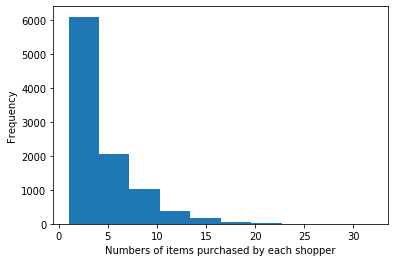

In [3]:
# So, the dataset includes shops of up to 32 items. We can see that there are no null objects in the
# "number of items" column, as we know the value for every shopper, nor in the "Item 1" column, because
# if a shopper hadn't bought anything they wouldn't be in this dataset. Let's visualise the "number of
# items" column to see the distribution.
plt.hist(basket["Item(s)"])
plt.xlabel("Numbers of items purchased by each shopper")
plt.ylabel("Frequency")
plt.show()

In [30]:
# We can also see how many unique items there are in the dataset:
unique_items = basket["Item 1"].unique()
print("Number of unique items in item 1 column: ", len(unique_items))


Number of unique items in item 1 column:  158


In [33]:
# So, the vast majority of customers are purchasing fewer than five items. We saw from the .info() method
# that all values in the columns for items 30-32 were null except for one, meaning only one customer 
# bought 30, 31 and 32 items respectively

# Now we will start using the a priori algorithm - we'll need to import it first
from mlxtend.frequent_patterns import apriori, association_rules
# We'll need to use one-hot encoding in order to get binary values for each item in the basket
encoded = []
for index, row in basket.iterrows():
    labels = {}
    uncommon_values = list(set(unique_items) - set(row))
    common_values = list(set(unique_items).intersection(row))
    for uv in uncommon_values:
        labels[uv] = 0
    for cv in common_values:
        labels[cv] = 1
    encoded.append(labels)
encoded[0]
one_hot_basket = pd.DataFrame(encoded)

In [44]:
# The a priori allows us to look at associations very quickly, and looks like this:
# apriori(dataframe, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
# Support is calulcated thus: Support(x) = Transactions with x / Total transactions - we set a minimum
# value for this to make sure we are looking at items that commonly appear
frequent_items = apriori(one_hot_basket, min_support=0.05, use_colnames=True, verbose=1)
frequent_items.head(30)

Processing 756 combinations | Sampling itemset size 2


,support,itemsets
0,0.052466,(beef)
1,0.077682,(canned beer)
2,0.079817,(newspapers)
3,0.104931,(tropical fruit)
4,0.075648,(pip fruit)
5,0.058973,(frankfurter)
6,0.193493,(other vegetables)
7,0.110524,(bottled water)
8,0.053279,(curd)
9,0.139502,(yogurt)


In [58]:
# We used a low value for min_support here to show a large number of items and their support values.
# Perhaps unsurprisingly, the most common are whole milk, vegetabels, rolls/buns and soda, which are 
# all common items.

# We can now look for association rules, which a rules that govern the relationships between different
# items

# We'll first use the confidence metric, which is calculated thus: confidence(x to y) = 
# transactions containing both (x and y))/(Transactions containing x)

# We are asking "given that a customer bought x, what is the probability they also bought y?"
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
3,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
4,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
5,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452


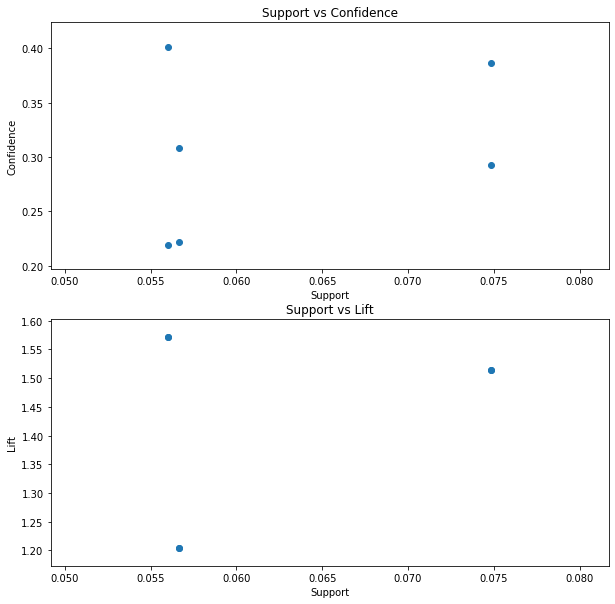

In [63]:
# You get an idea by looking at the table above as to what some of the relationships are between 
# the most common items, but we can visualise them to make this clearer
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
ax1.scatter(rules['support'], rules['confidence'])
ax1.set_xlabel("Support")
ax1.set_ylabel("Confidence")
ax1.set_title("Support vs Confidence")
ax2.scatter(rules["support"], rules["lift"])
ax2.set_xlabel("Support")
ax2.set_ylabel("Lift")
ax2.set_title("Support vs Lift")
plt.show()

In [ ]:
# What does the data tell us? Well, we lift show the likelihood of two products being bought together,
# while taking into account the popularity of both items. Lift above 1 means that the consequent is
# more likely to be bought with the other - for our top three pairs of items (whole milk/veg,
# whole milk/yoghurt, whole milk/rolls), this is the case. The supermarket, therefore, would do well
# to place these items together, as they are likely to be bought together.